# Valutazione dell'affidabilità dei sensori Lidar simulati 

## Librerie necessarie
In questo notebook vengono utilizzate le seguenti librerie:

In [4]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

## Funzioni per il plot delle traiettorie

plot_trajectory() mostra l'andamento della traiettoria passata in input.
plot_all_trajectories() mostra l'andamento di tutte le traiettorie passate in input, utilizzando lo stesso grafico

In [6]:
def plot_trajectory(trajectory, name):
    # * plot trajectory
    plt.plot(trajectory["x"], trajectory["y"], label=name)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()


def plot_all_trajectories(trajectories):
    # * plot all trajectories
    for label in trajectories:
        trajectory = trajectories[label]
        plt.plot(trajectory["x"], trajectory["y"], label=label)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

## Funzione per il plot delle nuvole di punti 

In [5]:
def plot_3d_points(
    clouds, colors, labels, elev=30, azim=-30, alphas=None, title=None, file_name=None
):
    if alphas is None:
        alphas = [1 for _ in clouds]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    for i, cloud in enumerate(clouds):
        x, y, z = cloud
        ax.scatter(x, y, z, c=colors[i], marker=".", label=labels[i], alpha=alphas[i])
    ax.set_box_aspect([1, 1, 1])
    # * rotazione di default: ax.view_init(elev=30, azim=-60)
    ax.view_init(elev=elev, azim=azim)

    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    if title is not None:
        ax.set_title(title)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show()

## Funzioni utili  
build_sphere costruisce una sfera e ritora i punti che la compongono, divisi in x, y e z

In [2]:

def build_sphere(radius=5, position=(0, 0, 0), traslation=(0, 0, 0)):
    phi = np.linspace(0, np.pi, 100)
    theta = np.linspace(0, 2 * np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)

    x = radius * np.sin(phi) * np.cos(theta) + position[0] + traslation[0]
    y = radius * np.sin(phi) * np.sin(theta) + position[1] + traslation[1]
    z = radius * np.cos(phi) + position[2] + traslation[2]

    return x, y, z

## Plot delle traiettorie da un Dataframe   

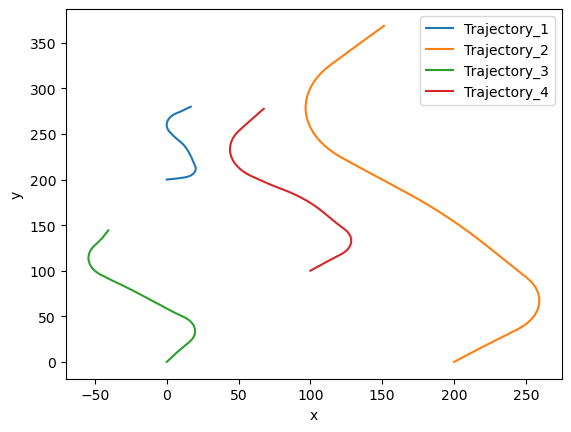

In [7]:

# * leggi i dati dal file csv e salva tutte le labels di riconoscimenti delle traiettorie in un array
vehicle_loc_rot = pd.read_csv("vehicle_keyframes.csv")
labels = vehicle_loc_rot["label"].unique()

# * test plot_all_trajectories per plottare tutte le traiettorie
trajectories = {}
for label in labels:
    trajectory = vehicle_loc_rot[vehicle_loc_rot["label"] == label].reset_index(
        drop=True
    )
    trajectories[label] = trajectory
plot_all_trajectories(trajectories)

## Verifica affidabilità della simulazione

Attraverso la simulazione di una sfera e di un sensore Lidar all'interno dell'ambiente di Blender, sono state generate le nuvole di punti archiviate nei file `scan_sphere.csv` e `scan_sphere_trasl.csv`. Tali file rappresentano rispettivamente la sfera prima e dopo il suo spostamento nello spazio tridimensionale.

La sfera, costruita per rispecchiare fedelmente le dimensioni della sua controparte simulata, è stata posizionata nello spazio in modo analogo a quanto simulato in precedenza. Successivamente, la sfera è stata traslata seguendo un procedimento analogo a quello precedentemente simulato.

Attraverso l'utilizzo della libreria Matplotlib, sono stati generati due grafici distinti:
1. Il primo grafico offre una visualizzazione della sfera simulata e della sfera traslata, consentendo una valutazione visiva delle analogie tra le due situazioni.
2. Il secondo grafico presenta le nuvole di punti estratte dai file CSV.

In [ ]:

scan = pd.read_csv("scan_sphere.csv")
x_scan = scan["x"]
y_scan = scan["y"]
z_scan = scan["z"]

scan_trasl = pd.read_csv("scan_sphere_trasl.csv")
x_scan_trasl = scan_trasl["x"]
y_scan_trasl = scan_trasl["y"]
z_scan_trasl = scan_trasl["z"]

x_sphere, y_sphere, z_sphere = build_sphere(
    radius=2, position=(0, 6, -7), traslation=(0, 0, 0)
)
x_sphere_trasl, y_sphere_trasl, z_sphere_trasl = build_sphere(
    radius=2, position=(0, 6, -7), traslation=(0, -2, 1)
)

In [ ]:

plot_3d_points(
    [(x_scan, y_scan, z_scan), (x_scan_trasl, y_scan_trasl, z_scan_trasl)],
    colors=["blue", "red"],
    labels=["prima della traslazione", "dopo la traslazione"],
    file_name="jupyter_plots/scan_sphere.png",
)

plot_3d_points(
    [(x_sphere, y_sphere, z_sphere), (x_sphere_trasl, y_sphere_trasl, z_sphere_trasl)],
    colors=["green", "orange"],
    labels=["prima della traslazione", "dopo la traslazione"],
    file_name="jupyter_plots/sphere.png",
)


Nel contesto di situazioni simili create, ci si aspetta che i due grafici siano compatibili, a condizione che la simulazione dei sensori Lidar sia accurata. Tale analisi visiva costituisce un mezzo per valutare la coerenza tra la simulazione e le situazioni reali rappresentate attraverso i dati dei sensori Lidar.

In [ ]:

plot_3d_points(
    [
        (x_scan, y_scan, z_scan),
        (x_scan_trasl, y_scan_trasl, z_scan_trasl),
        (x_sphere, y_sphere, z_sphere),
        (x_sphere_trasl, y_sphere_trasl, z_sphere_trasl),
    ],
    colors=["blue", "red", "green", "orange"],
    labels=[
        "nuvola prima della traslazione",
        "nuvola dopo la traslazione",
        "sfera prima della traslazione",
        "sfera dopo la traslazione",
    ],
    alphas=[1, 1, 0.1, 0.1],
    file_name="jupyter_plots/overlap.png",
)

## Analisi delle nuvole di punti di un sensore Lidar in uno scenario con veicolo

Di seguito plottiamo i dati raccolti da un sensore Lidar in uno scenario con veicolo. La traiettoria in questione è formata da 80 timestep ed è una di quelle riportante sopra (a forma di "S"). 

In [ ]:
for i in range(40):
    # * esamino i dati a intervall di 2 timestep
    if i % 1 == 0:
        scan = pd.read_csv(f"scans/csv/camera_1_{i}.csv")
        x_scan = scan["x"]
        y_scan = scan["y"]
        z_scan = scan["z"]
        plot_3d_points(
            [(x_scan, y_scan, z_scan)],
            colors=["blue"],
            labels=["nuvola"],
            title=f"timestep {i}",
            elev=45,
            azim=180,
            file_name=f"jupyter_plots/scan_{i}.png",
        )

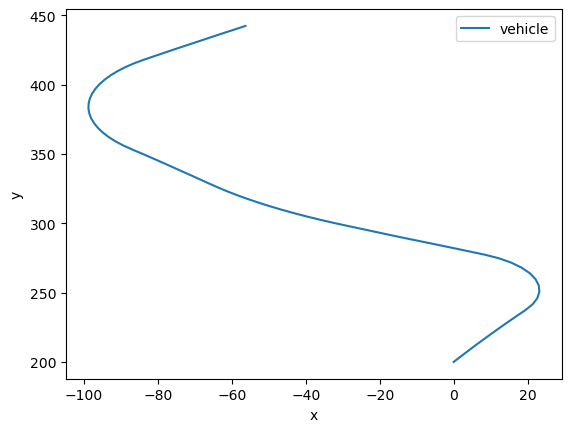

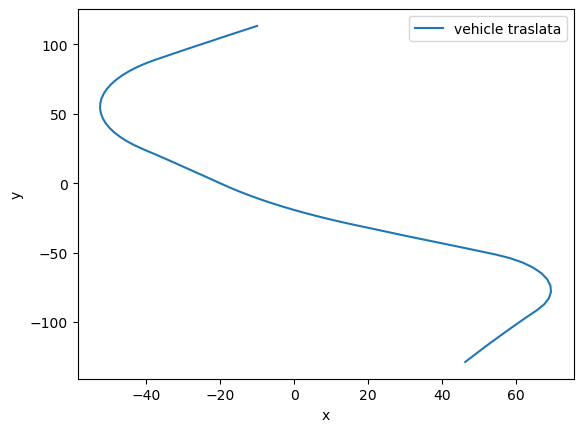

In [8]:

# plot_trajectory(trajectories["Trajectory_1"], "vehicle")
def center_trajectory(trajectory):
    plot_trajectory(trajectory, "vehicle")
    x_coords = trajectory["x"]
    y_coords = trajectory["y"]

    centroid_x = np.mean(x_coords)
    centroid_y = np.mean(y_coords)

    translation_x = -centroid_x
    translation_y = -centroid_y

    x_coords_trasl = x_coords + translation_x
    y_coords_trasl = y_coords + translation_y

    trajectory["x"] = x_coords_trasl
    trajectory["y"] = y_coords_trasl
    plot_trajectory(trajectory, "vehicle traslata")

center_trajectory(trajectories["Trajectory_1"])